In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [4]:
def convert_to_float(x):
    try:
        return float(x)
    except ValueError:
        return float('nan')

In [5]:
LABELS = ['Downstairs',
          'Jogging',
          'Sitting',
          'Standing',
          'Upstairs',
          'Walking']
columns = ['user-id','activity','timestamp','x-axis','y-axis','z-axis']
df = pd.read_csv('/kaggle/input/wisdm-data/WISDM_ar_v1.1_raw (1).txt', header=None, names=columns)
df['z-axis'].replace(to_replace=r';',value=r'',regex=True,inplace=True)
df['z-axis'] = df['z-axis'].apply(convert_to_float)
df.dropna(axis=0, how='any', inplace=True)

ParserError: Error tokenizing data. C error: Expected 6 fields in line 134634, saw 11


In [6]:
# Load a few lines of the data around the problematic line
problematic_line = 134634
lines_to_display = 5

with open('/kaggle/input/wisdm-data/WISDM_ar_v1.1_raw (1).txt') as file:
    # Read and display the lines
    for i, line in enumerate(file):
        if i >= problematic_line - lines_to_display and i <= problematic_line + lines_to_display:
            print(f"Line {i}: {line}")

# Also, let's print the contents of the columns to understand the issue
print("Column names:", columns)


Line 134629: 13,Downstairs,3498532268000,1.54,7.78,4.0180025;

Line 134630: 13,Downstairs,3498582255000,0.72,10.12,3.173541;

Line 134631: 13,Downstairs,3498632274000,1.5,8.81,3.8273177;

Line 134632: 13,Downstairs,3498682201000,1.99,7.86,2.9147544;

Line 134633: 13,Downstairs,3498732310000,5.13,10.42,4.671779;15,Jogging,328982249000,5.37,-3.36,7.3141265;

Line 134634: 15,Jogging,329032176000,-1.42,2.26,-5.6252036;

Line 134635: 15,Jogging,329082652000,-18.77,17.77,-5.8158884;

Line 134636: 15,Jogging,329134776000,-13.91,18.16,4.6036777;

Line 134637: 15,Jogging,329134776000,-13.91,18.16,4.6036777;

Line 134638: 15,Jogging,329134776000,-13.91,18.16,4.6036777;

Line 134639: 15,Jogging,0,0,0,0.0;

Column names: ['user-id', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']


In [7]:
import pandas as pd

# Define the column names
columns = ['user-id', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']

# Read the data from the specified file, skipping the problematic line
df = pd.read_csv('/kaggle/input/wisdm-data/WISDM_ar_v1.1_raw (1).txt', sep=',', header=None, names=columns, skiprows=[134634])

# Replace semicolon in 'z-axis' and convert to float
df['z-axis'] = df['z-axis'].str.replace(';', '').astype(float)

# Drop rows with missing values
df.dropna(axis=0, how='any', inplace=True)

# Print the first few rows to verify the data and structure
print("First few rows of the DataFrame:")
print(df.head())

# Plot the activity counts
df['activity'].value_counts().plot(kind='bar', title='Records by Activity type')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()


ParserError: Error tokenizing data. C error: Expected 6 fields in line 134634, saw 11


In [8]:
import pandas as pd

# Define the column names
columns = ['user-id', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']

# Function to parse each line
def parse_line(line):
    parts = line.strip().split(',')
    user_id = int(parts[0])
    activity = parts[1]
    timestamp = int(parts[2])
    x_axis = float(parts[3])
    y_axis = float(parts[4])
    z_axis = float(parts[5].split(';')[0])  # Handle varying field lengths
    return [user_id, activity, timestamp, x_axis, y_axis, z_axis]

# Read the data from the specified file, parsing each line
data = []
with open('/kaggle/input/wisdm-data/WISDM_ar_v1.1_raw (1).txt') as file:
    for line in file:
        data.append(parse_line(line))

# Create a DataFrame from the parsed data
df = pd.DataFrame(data, columns=columns)

# Print the first few rows to verify the data and structure
print("First few rows of the DataFrame:")
print(df.head())

# Plot the activity counts
df['activity'].value_counts().plot(kind='bar', title='Records by Activity type')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()


ValueError: invalid literal for int() with base 10: ''

In [ ]:
import pandas as pd

# Define the column names
columns = ['user-id', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']

# Function to parse each line
def parse_line(line):
    parts = line.strip().split(',')
    if len(parts) == 6:
        user_id = int(parts[0])
        activity = parts[1]
        timestamp = int(parts[2])
        x_axis = float(parts[3])
        y_axis = float(parts[4])
        z_axis = float(parts[5].split(';')[0])  # Handle varying field lengths
        return [user_id, activity, timestamp, x_axis, y_axis, z_axis]
    else:
        return None  # Skip lines with incorrect format

# Read the data from the specified file, parsing each line
data = []
with open('/kaggle/input/wisdm-data/WISDM_ar_v1.1_raw (1).txt') as file:
    for line in file:
        parsed_line = parse_line(line)
        if parsed_line:
            data.append(parsed_line)

# Create a DataFrame from the parsed data
df = pd.DataFrame(data, columns=columns)

# Print the first few rows to verify the data and structure
print("First few rows of the DataFrame:")
print(df.head())

# Plot the activity counts
df['activity'].value_counts().plot(kind='bar', title='Records by Activity type')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()


First few rows of the DataFrame:
   user-id activity       timestamp    x-axis     y-axis    z-axis
0       33  Jogging  49105962326000 -0.694638  12.680544  0.503953
1       33  Jogging  49106062271000  5.012288  11.264028  0.953424
2       33  Jogging  49106112167000  4.903325  10.882658 -0.081722
3       33  Jogging  49106222305000 -0.612916  18.496431  3.023717
4       33  Jogging  49106332290000 -1.184970  12.108489  7.205164


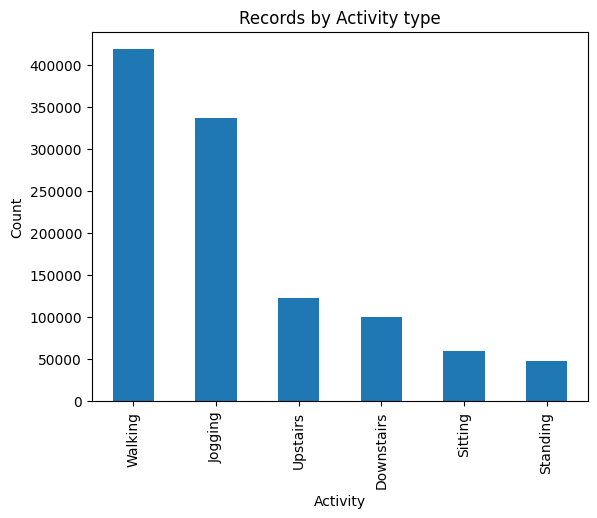

In [9]:
import pandas as pd

# Define the column names
columns = ['user-id', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']

# Function to parse each line
def parse_line(line):
    parts = line.strip().split(',')
    if len(parts) == 6 and all(parts):
        try:
            user_id = int(parts[0])
            activity = parts[1]
            timestamp = int(parts[2])
            x_axis = float(parts[3])
            y_axis = float(parts[4])
            z_axis = float(parts[5].split(';')[0])  # Handle varying field lengths
            return [user_id, activity, timestamp, x_axis, y_axis, z_axis]
        except ValueError:
            pass  # Skip lines with invalid numeric fields
    return None  # Skip lines with incorrect format

# Read the data from the specified file, parsing each line
data = []
with open('/kaggle/input/wisdm-data/WISDM_ar_v1.1_raw (1).txt') as file:
    for line in file:
        parsed_line = parse_line(line)
        if parsed_line:
            data.append(parsed_line)

# Create a DataFrame from the parsed data
df = pd.DataFrame(data, columns=columns)

# Print the first few rows to verify the data and structure
print("First few rows of the DataFrame:")
print(df.head())

# Plot the activity counts
df['activity'].value_counts().plot(kind='bar', title='Records by Activity type')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()


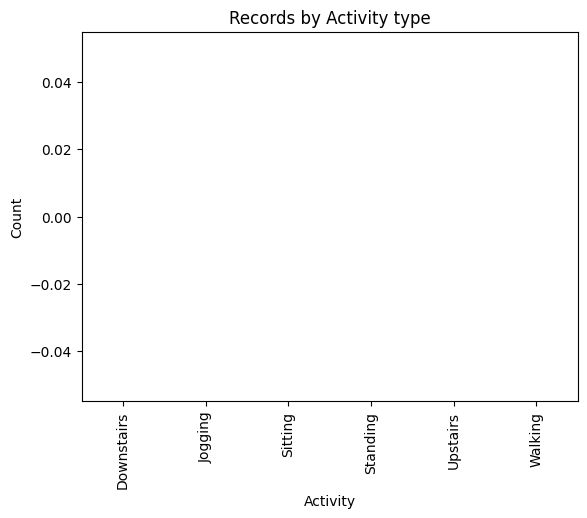

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the activity labels
LABELS = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']

# Define the column names
columns = ['user-id', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']

# Read the data from the specified file
#file_path = '/kaggle/input/wisdm-data/WISDM_ar_v1.1_raw (1).txt'
#df = pd.read_csv(file_path, sep=',', header=None, names=columns, skiprows=lambda x: x == 134634)
df = pd.read_csv('/kaggle/input/wisdm-data/WISDM_ar_v1.1_raw (1).txt', sep='\t', header=None, names=columns, skiprows=lambda x: x == 134634)
df['z-axis'].replace(to_replace=r';',value=r'',regex=True,inplace=True)
# Replace semicolon in 'z-axis' and convert to float
df['z-axis'] = df['z-axis'].apply(convert_to_float)
#df.dropna(axis=0, how='any', inplace=True)

#df['z-axis'] = df['z-axis'].str.replace(';', '').astype(float)

# Drop rows with missing values
df.dropna(axis=0, how='any', inplace=True)

# Plot the activity counts
activity_counts = df['activity'].value_counts()
activity_counts = activity_counts.reindex(LABELS, fill_value=0)  # Fill missing labels with 0 count
activity_counts.plot(kind='bar', title='Records by Activity type')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

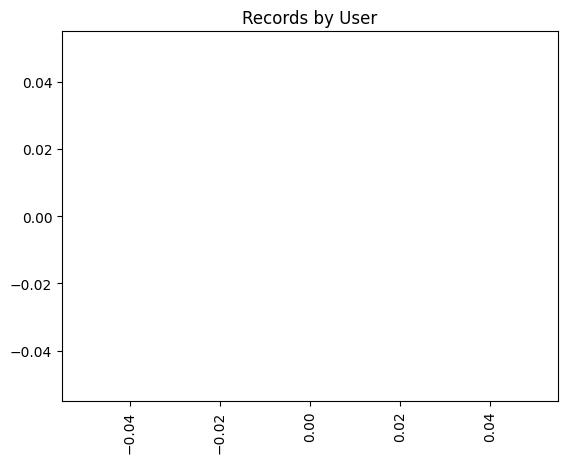

In [11]:
#visualizing the data based on user id
df['user-id'].value_counts().plot(kind='bar',title='Records by User')
plt.show()

In [ ]:
#Adding a new column for encoded activities
activity_labels = LabelEncoder()
df['ActivityEncoded'] = activity_labels.fit_transform(df['activity'].values.ravel())

In [ ]:
#Splitting into training and testing data
df_train = df[df['user-id'] > 28]
df_test = df[df['user-id'] <= 28]

In [ ]:
#Normisation of data
pd.options.mode.chained_assignment = None  # default='warn'
df_train['x-axis'] = df_train['x-axis'] / df_train['x-axis'].max()
df_train['y-axis'] = df_train['y-axis'] / df_train['y-axis'].max()
df_train['z-axis'] = df_train['z-axis'] / df_train['z-axis'].max()
# Round numbers
df_train = df_train.round({'x-axis': 4, 'y-axis': 4, 'z-axis': 4})

In [ ]:
from scipy import stats #statistical functions of scipy library
#TIME_PERIODS stores the length of the time segment
TIME_PERIODS = 80
#STEP_DISTANCE determines the amount of overlap between two consecutive time segments
STEP_DISTANCE = 40
# x, y, z acceleration as features
N_FEATURES = 3

segments = []
labels = []
for i in range(0, len(df_train) - TIME_PERIODS, STEP_DISTANCE):
    xs = df_train['x-axis'].values[i: i + TIME_PERIODS]
    ys = df_train['y-axis'].values[i: i + TIME_PERIODS]
    zs = df_train['z-axis'].values[i: i + TIME_PERIODS]
    # Retrieve the most often used label in this segment
    label = stats.mode(df_train['ActivityEncoded'][i: i + TIME_PERIODS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)

# Bring the segments into a better shape
x_train = np.asarray(segments, dtype= np.float32).reshape(-1, TIME_PERIODS, N_FEATURES)
y_train = np.asarray(labels)

In [ ]:
from collections import Counter
from scipy import stats
import numpy as np

# ... (previous code)

segments = []
labels = []

for i in range(0, len(df_train) - TIME_PERIODS, STEP_DISTANCE):
    xs = df_train['x-axis'].values[i: i + TIME_PERIODS]
    ys = df_train['y-axis'].values[i: i + TIME_PERIODS]
    zs = df_train['z-axis'].values[i: i + TIME_PERIODS]

    # Retrieve the most common label in this segment
    segment_labels = df_train['ActivityEncoded'].values[i: i + TIME_PERIODS]
    label = Counter(segment_labels).most_common(1)[0][0]

    segments.append([xs, ys, zs])
    labels.append(label)

# Bring the segments into a better shape
x_train = np.asarray(segments, dtype=np.float32).reshape(-1, TIME_PERIODS, N_FEATURES)
y_train = np.asarray(labels)

# ... (rest of your code)


In [ ]:
num_time_periods, num_sensors = x_train.shape[1],x_train.shape[2]
num_classes = activity_labels.classes_.size

In [12]:
x_train = x_train.reshape(x_train.shape[0], num_time_periods*num_sensors)

NameError: name 'x_train' is not defined

In [13]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

NameError: name 'x_train' is not defined

In [14]:
y_train_hot = np_utils.to_categorical(y_train, num_classes)

NameError: name 'y_train' is not defined

In [15]:
model_dnn = Sequential()
model_dnn.add(Reshape((TIME_PERIODS, 3), input_shape=(num_time_periods*num_sensors,)))
model_dnn.add(Dense(100, activation='relu'))
model_dnn.add(Dense(100, activation='relu'))
model_dnn.add(Dense(100, activation='relu'))
model_dnn.add(Flatten())
model_dnn.add(Dense(num_classes, activation='softmax'))
model_dnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

NameError: name 'TIME_PERIODS' is not defined

In [16]:
BATCH_SIZE = 100
EPOCHS = 50
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]
#history = model_dnn.fit(x_train, y_train_hot,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callbacks_list,valirain_hot,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callbacks_list,validation_split=0.2,verbose=1)

In [17]:
history = model_dnn.fit(
    x_train,
    y_train_hot,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks_list,
    validation_split=0.2,
    verbose=1
)


NameError: name 'x_train' is not defined

In [18]:
# Compile the model with accuracy as a metric
model_dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ... Rest of your code ...

# Train the model
history = model_dnn.fit(x_train, y_train_hot, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=callbacks_list, validation_split=0.2, verbose=1)

# ... Rest of your code ...

# Plot accuracy and loss
plt.figure()
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.legend()
plt.show()


NameError: name 'x_train' is not defined

In [19]:
plt.figure()
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.legend()
plt.show()


NameError: name 'history' is not defined

<Figure size 640x480 with 0 Axes>

In [20]:
#Normisation of test data
pd.options.mode.chained_assignment = None  # default='warn'
df_test['x-axis'] = df_test['x-axis'] / df_test['x-axis'].max()
df_test['y-axis'] = df_test['y-axis'] / df_test['y-axis'].max()
df_test['z-axis'] = df_test['z-axis'] / df_test['z-axis'].max()
# Round numbers
df_test = df_test.round({'x-axis': 4, 'y-axis': 4, 'z-axis': 4})

NameError: name 'df_test' is not defined

In [21]:
from scipy import stats #statistical functions of scipy library
#TIME_PERIODS stores the length of the time segment
TIME_PERIODS = 80
#STEP_DISTANCE determines the amount of overlap between two consecutive time segments
STEP_DISTANCE = 40
# x, y, z acceleration as features
N_FEATURES = 3

segments = []
# Initialize an empty array to store the labels
labels = []

# Iterate over the segments
for i in range(0, len(df_test) - TIME_PERIODS, STEP_DISTANCE):
    xs = df_test['x-axis'].values[i: i + TIME_PERIODS]
    ys = df_test['y-axis'].values[i: i + TIME_PERIODS]
    zs = df_test['z-axis'].values[i: i + TIME_PERIODS]
    
    # Retrieve the most often used label in this segment
    segment_labels = df_test['ActivityEncoded'][i: i + TIME_PERIODS]
    
    # Check if the segment has more than one label
    if len(segment_labels) > 1:
        label = stats.mode(segment_labels)[0][0]
    else:
        label = segment_labels.iloc[0]  # Use the single label if there's only one
    
    segments.append([xs, ys, zs])
    labels.append(label)

# Bring the segments into a better shape
x_test = np.asarray(segments, dtype= np.float32).reshape(-1, TIME_PERIODS, N_FEATURES)
y_test = np.asarray(labels)

num_time_periods, num_sensors = x_test.shape[1],x_test.shape[2]
num_classes = activity_labels.classes_.size

x_test = x_test.reshape(x_test.shape[0], num_time_periods*num_sensors)

x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

y_test_hot = np_utils.to_categorical(y_test, num_classes)

NameError: name 'df_test' is not defined